<a href="https://colab.research.google.com/github/xanasa14/MLImplementations/blob/master/NaiveBayesFromOnlineDatasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np, pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
sns.set() # use seaborn plotting style

In [3]:
# Load the dataset
data = fetch_20newsgroups()
# Get the text categories
text_categories = data.target_names
# define the training set
train_data = fetch_20newsgroups(subset="train", categories=text_categories)
# define the test set
test_data = fetch_20newsgroups(subset="test", categories=text_categories)

In [4]:
print("We have {} unique classes".format(len(text_categories)))
print("We have {} training samples".format(len(train_data.data)))
print("We have {} test samples".format(len(test_data.data)))

We have 20 unique classes
We have 11314 training samples
We have 7532 test samples


In [5]:
# Build the model
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
# Train the model using the training data
model.fit(train_data.data, train_data.target)
# Predict the categories of the test data
predicted_categories = model.predict(test_data.data)

In [9]:
print(np.array(test_data.target_names)[predicted_categories])
print(np.array(['rec.autos', 'sci.crypt', 'alt.atheism', 
       'rec.sport.baseball', 'comp.sys.ibm.pc.hardware', 
       'soc.religion.christian'], dtype='<U24'))

['rec.autos' 'sci.crypt' 'alt.atheism' ... 'rec.sport.baseball'
 'comp.sys.ibm.pc.hardware' 'soc.religion.christian']
['rec.autos' 'sci.crypt' 'alt.atheism' 'rec.sport.baseball'
 'comp.sys.ibm.pc.hardware' 'soc.religion.christian']


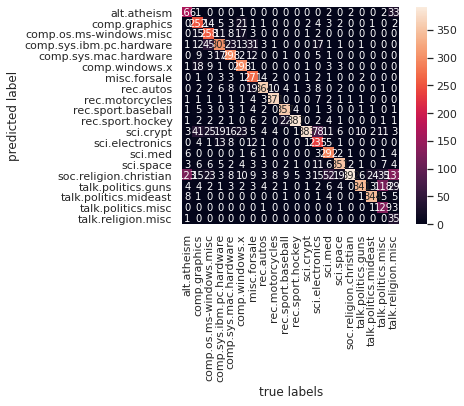

The accuracy is 0.7738980350504514


In [11]:
# plot the confusion matrix
mat = confusion_matrix(test_data.target, predicted_categories)
sns.heatmap(mat.T, square = True, annot=True, fmt = "d", xticklabels=train_data.target_names,yticklabels=train_data.target_names)
plt.xlabel("true labels")
plt.ylabel("predicted label")
plt.show()
print("The accuracy is {}".format(accuracy_score(test_data.target, predicted_categories)))
#he accuracy is 0.7738980350504514